## 1. Normal

### 1.1. Build from Softmax

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 28*28))
x_test  = tf.reshape(x_test, (-1, 28*28))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

In [ ]:
# data normalization

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is B2CB-C7E5

 Directory of c:\Users\PC\Desktop\Tensorflow_Tutorial\Machine_Learning\MLP

04/14/2023  07:40 PM    <DIR>          .
04/11/2023  05:13 PM    <DIR>          ..
04/14/2023  07:55 PM           199,657 1.MLP_normal.ipynb
04/14/2023  07:40 PM           301,710 2.MLP_custom_layers.ipynb
04/14/2023  07:38 PM    <DIR>          images
04/14/2023  07:50 PM             3,834 README.md
               3 File(s)        505,201 bytes
               3 Dir(s)  96,350,826,496 bytes free


C:\Users\PC\Desktop\Tensorflow_Tutorial\Machine_Learning\MLP


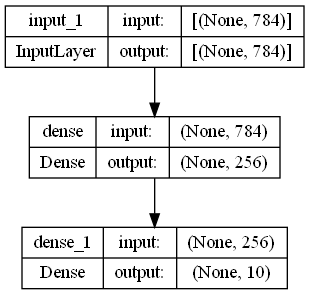

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="./images/my_model.png", show_shapes=True)

In [7]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.8012 - sparse_categorical_accuracy: 0.7298 - val_loss: 0.6067 - val_sparse_categorical_accuracy: 0.7887 - 734ms/epoch - 3ms/step
Epoch 2/100
235/235 - 0s - loss: 0.5431 - sparse_categorical_accuracy: 0.8134 - val_loss: 0.5371 - val_sparse_categorical_accuracy: 0.8108 - 478ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4903 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.5028 - val_sparse_categorical_accuracy: 0.8205 - 501ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4611 - sparse_categorical_accuracy: 0.8391 - val_loss: 0.4857 - val_sparse_categorical_accuracy: 0.8269 - 504ms/epoch - 2ms/step
Epoch 5/100
235/235 - 0s - loss: 0.4410 - sparse_categorical_accuracy: 0.8456 - val_loss: 0.4712 - val_sparse_categorical_accuracy: 0.8313 - 498ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4265 - sparse_categorical_accuracy: 0.8510 - val_loss: 0.4580 - val_sparse_categorical_accuracy: 0.8344 - 500ms/epoch - 2ms/step
Epoch 7/100
235/

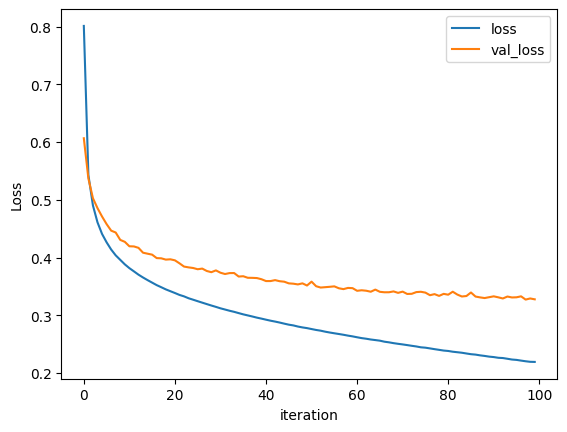

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

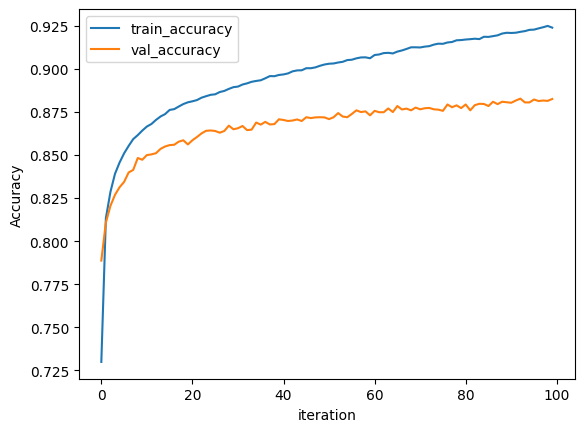

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### 1.2. Sử dụng Flatten()

In [11]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [12]:
# data normalization

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [13]:
import tensorflow as tf
import tensorflow.keras as keras

model = keras.Sequential()
model.add(keras.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.8013 - sparse_categorical_accuracy: 0.7299 - val_loss: 0.6135 - val_sparse_categorical_accuracy: 0.7865 - 735ms/epoch - 3ms/step
Epoch 2/100
235/235 - 1s - loss: 0.5468 - sparse_categorical_accuracy: 0.8090 - val_loss: 0.5518 - val_sparse_categorical_accuracy: 0.8010 - 554ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4928 - sparse_categorical_accuracy: 0.8269 - val_loss: 0.5062 - val_sparse_categorical_accuracy: 0.8224 - 558ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4625 - sparse_categorical_accuracy: 0.8390 - val_loss: 0.4845 - val_sparse_categorical_accuracy: 0.8277 - 546ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4425 - sparse_categorical_accuracy: 0.8454 - val_loss: 0.4672 - val_sparse_categorical_accuracy: 0.8347 - 543ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4270 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8365 - 541ms/epoch - 2ms/step
Epoch 7/100
235/

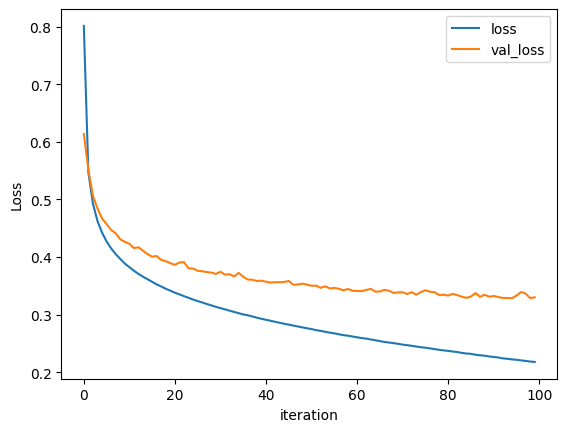

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

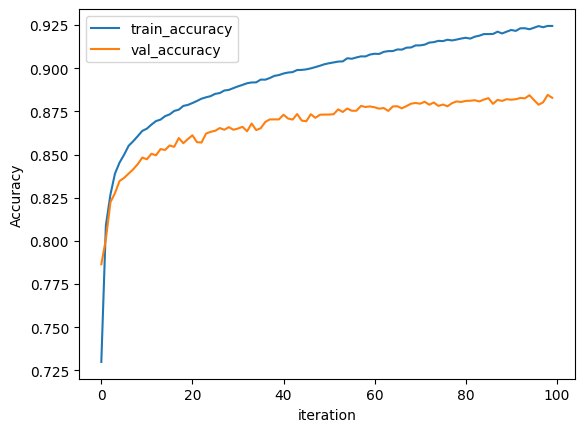

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()